In [1]:
import tilelit as ti

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
im_er = np.load('./im_er_resize_10.npy')
im_her = np.load('./im_her_resize_10.npy')
im_he = np.load('./im_he_resize_10.npy')

In [4]:
im_er.shape

(3008, 2340, 4)

In [5]:
im_er.shape

(3008, 2340, 4)

In [6]:
img_er_bw = im_er[..., 2] #np.sum(im_er, -1)
img_he_bw = im_he[..., 2] #np.sum(im_he, -1)

In [7]:
img_initial, aff_initial  = ti.initial_alignment(img_er_bw, img_he_bw)

In [9]:
img_final, aff_final = ti.fine_alignment(img_er_bw, img_he_bw, starting_affine=aff_initial)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


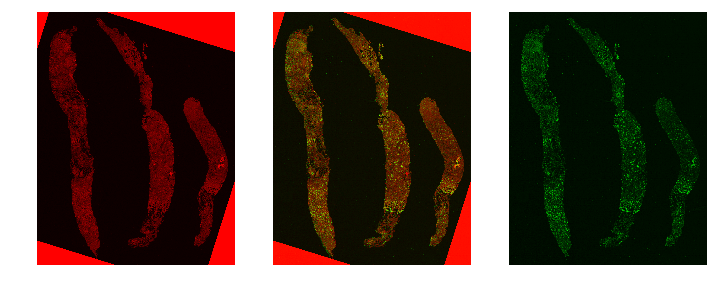

In [12]:
new_image1, new_image2 = ti.plot_together(1-(img_final/img_final.max()), 1-(img_er_bw/img_er_bw.max()))
#new_image1, new_image2 = plot_together(ax, img_final, img_er_bw)

In [13]:
aff_final

array([[   0.94946898,   -0.29645278,  230.53806427],
       [   0.30148364,    0.95447538, -138.00414061],
       [   0.        ,    0.        ,    1.        ]])

In [155]:
box_size = (100, 100)

In [173]:
y_center = round(np.random.rand() * (im_er.shape[0] - box_size[0]//2) + box_size[0] // 2)

In [174]:
x_center = round(np.random.rand() * (im_er.shape[1] - box_size[1]//2) + box_size[1] // 2)

In [175]:
corner1 = np.array([y_center - box_size[0] // 2, x_center - box_size[1] // 2, 1])
corner2 = np.array([y_center + box_size[0] // 2, x_center + box_size[1] // 2, 1])

In [176]:
foo = im_er[corner1[0]:corner2[0], corner1[1]:corner2[1]]

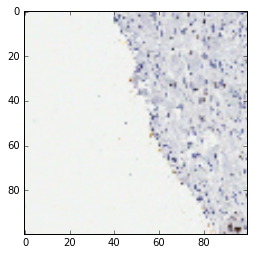

In [177]:
plt.imshow(foo)

In [178]:
aff_final

array([[   0.94946898,   -0.29645278,  230.53806427],
       [   0.30148364,    0.95447538, -138.00414061],
       [   0.        ,    0.        ,    1.        ]])

In [179]:
corner1_trans = (np.round(np.dot(aff_final, corner1))).astype(int)

In [180]:
corner2_trans = (np.round(np.dot(aff_final, corner2))).astype(int)

In [181]:
corner1, corner2, corner1_trans, corner2_trans

(array([1255, 1721,    1]),
 array([1355, 1821,    1]),
 array([ 912, 1883,    1]),
 array([ 977, 2009,    1]))

In [182]:
foo = im_he[corner1_trans[0]:corner2_trans[0], corner1_trans[1]:corner2_trans[1]]

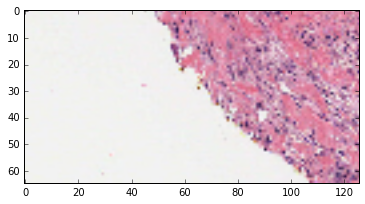

In [183]:
plt.imshow(foo)